In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

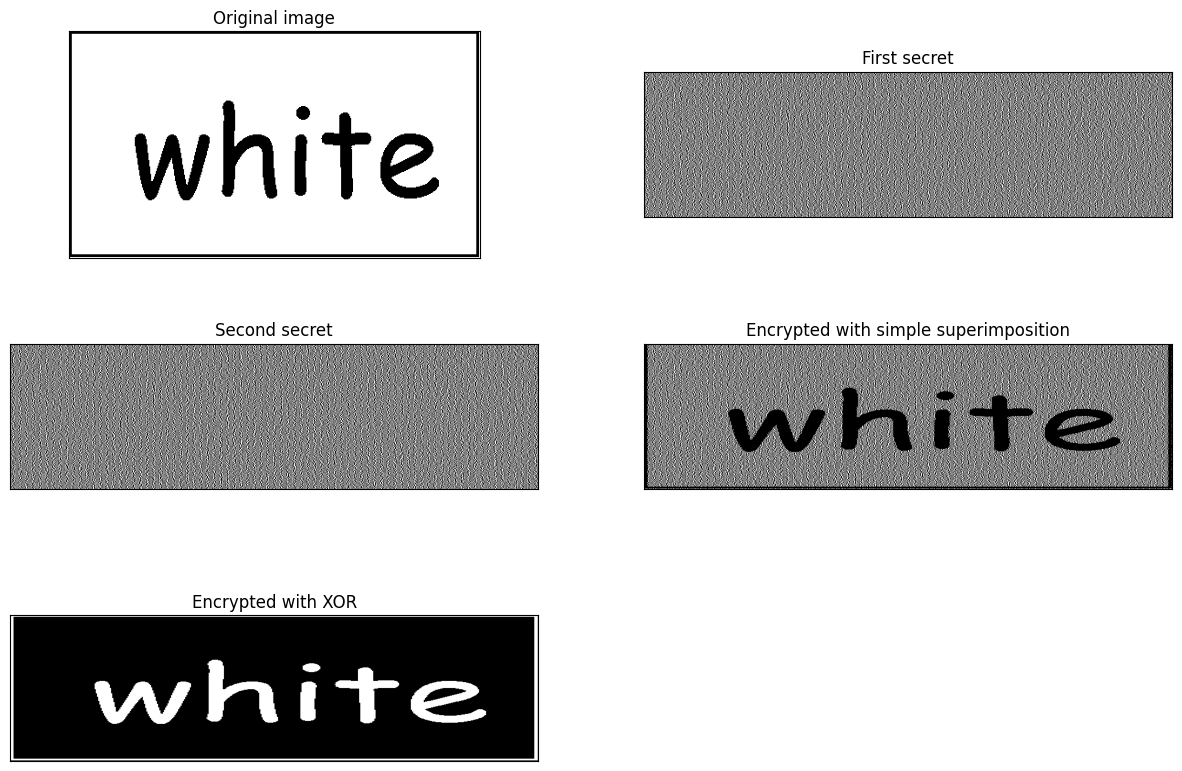

In [8]:
img = cv2.imread('white.jpg', cv2.IMREAD_GRAYSCALE)
threshold = 128

img_bin = np.asarray(cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1])
binary = img_bin > threshold
img_bin = binary.astype(int)
x = img_bin.shape[0]
y = img_bin.shape[1]

secret1 = np.zeros((x,y * 2))
secret2 = np.zeros((x,y * 2))


for i in range(x):
  o = 0
  for j in range(0, y*2, 2):
    p1 = random.randint(0, 1)
    p2 = 1 if p1 == 0 else 0
    secret1[i][j] = p1
    secret1[i][j+1] = p2
    oryg = img_bin[i][o]
    if oryg == 1:
        secret2[i][j] = p1
        secret2[i][j+1] = p2
    else:
        secret2[i][j] = p2
        secret2[i][j+1] = p1
    o += 1

superposition = np.zeros((x, y * 2))
for i in range(len(secret1)):
  for j in range(len(secret1[0])):
    if secret1[i][j] == 0 or secret2[i][j] == 0:
      superposition[i][j] = 0
    else:
      superposition[i][j] = 1

final_result = np.logical_xor(secret1, secret2)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax[0, 0].title.set_text('Original image')
ax[0, 0].imshow(img_bin, cmap='gray')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])


ax[0, 1].title.set_text('First secret')
ax[0, 1].imshow(secret1, cmap='gray')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].title.set_text('Second secret')
ax[1, 0].imshow(secret2, cmap='gray')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].title.set_text('Encrypted with simple superimposition')
ax[1, 1].imshow(superposition, cmap='gray')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

ax[2, 0].title.set_text('Encrypted with XOR')
ax[2, 0].imshow(final_result, cmap='gray')
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])

fig.delaxes(ax[2,1])
